In [1]:
import numpy as np
import matplotlib.pyplot as plt


from hnc_n_multiscale import  HNC_solver
from qsps import *

# Two Species

Here we do QSP interactions between electrons and one ion type. 

Using $\tilde{r}\equiv r/r_s$, we implement potentials 
\begin{align}
\beta v_{ee}(\tilde{r}) &=  \frac{\Gamma_{ee}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right) +  \ln2 \exp\left[-\tilde{r}^2 r_s^2/(\pi \Lambda_e^2 \ln 2)\right]\\
\beta v_{ei}(\tilde{r}) &=  \frac{\Gamma_{ei}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right)\\
\beta v_{ii}(\tilde{r}) &=  \frac{\Gamma_{ii}}{\tilde{r}}
\end{align}
For  
\begin{align}
\Gamma_{ee}&=\frac{\beta e^2}{r_s}\\
\Gamma_{ei}&=\frac{\beta Z_i e^2}{r_s}\\
\Gamma_{ii}&=\frac{\beta Z_i^2 e^2}{r_s}\\
\end{align}

Plug into get potentials

In [19]:
ri=3
Te_c = 1*eV 
Ti   = 1*eV 
Z, A = 13, 27
Zstar= 3
# "Classical-Map  Hypernetted  Chain  Calculations  for  DensePlasmas"R. Bredow1∗, Th. Bornath1, W.-D. Kraeft1, M.W.C. Dharma-wardana2,andR. Redmer1
Tq  = 0#1/5*E_F 


def make_Te(Te_c, Tq):
    Te  = np.sqrt(Tq**2 + Te_c**2)
    return Te

Te = make_Te(Te_c, Tq)
    
qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)


Λee = 4.358
Γii=81.6, Γie=-27.2, Γee=9.1 
r_i=3.0
r_e=2.1


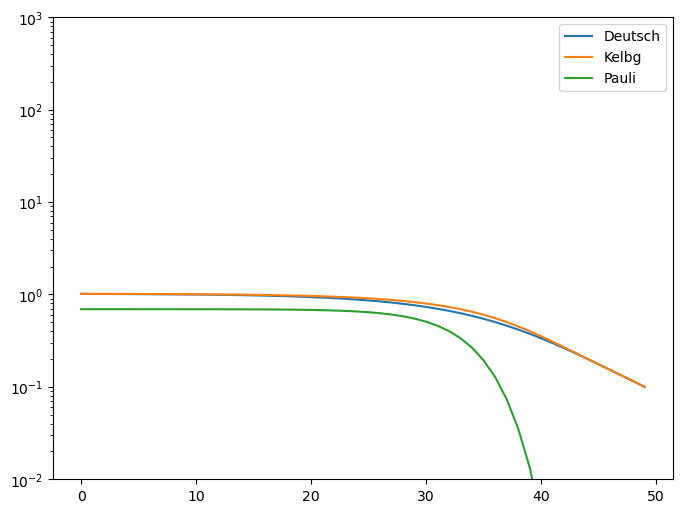

In [47]:

fig, ax = plt.subplots(figsize=(8,6),facecolor='w')

xs = np.geomspace(1e-2,10)
ax.plot(qsp.βv_Deutsch(1,xs),label='Deutsch')
ax.plot(qsp.βv_Kelbg(1,xs),label='Kelbg')
ax.plot(qsp.βv_Pauli(xs),label='Pauli')

# ax.plot(βvee(xs),label='βvee')
# ax.plot(-βvei(xs),label='-βvei')
# ax.plot(-βvei_atomic(xs),label='-βvei Atomic')
# ax.plot(βvii(xs),label='βvii')

ax.set_yscale('log')
ax.set_ylim(1e-2,1e3)
ax.legend()

First, we initialize the hnc

In [120]:
N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])

names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc2 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-6,
                 kappa_multiscale=0.5, rho = rho, num_iterations=int(1e3), 
                 R_max=10, N_bins=1000, names=names, dst_type=3)


In [121]:
βu_r_matrix = np.array([[qsp.βvii(hnc2.r_array), qsp.βvei(hnc2.r_array)],
                        [qsp.βvei(hnc2.r_array), qsp.βvee(hnc2.r_array)]])

hnc2.set_βu_matrix(βu_r_matrix)
# hnc2.initialize_guess()
hnc2.initialize_c_k()
hnc2.set_C_matrix()

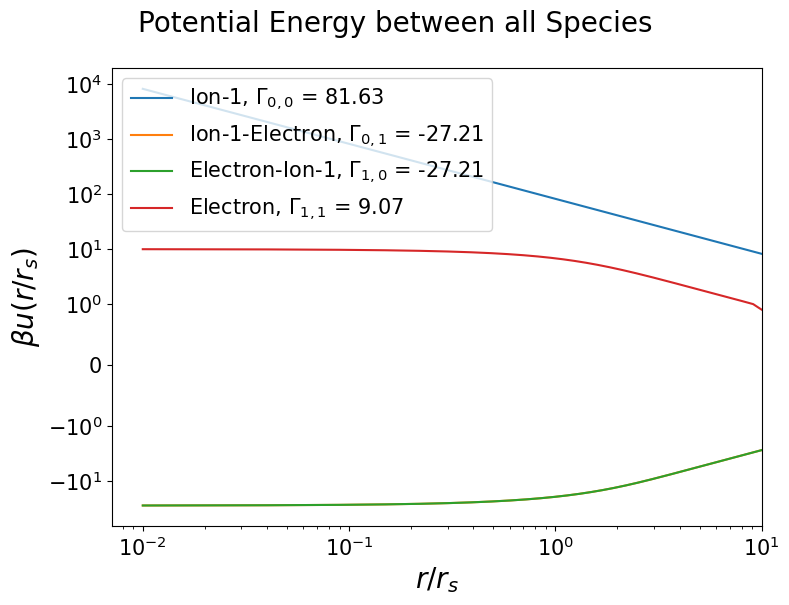

In [122]:
hnc2.plot_βu_all_species()

In [123]:
# hnc2.HNC_solve(alpha=1e-1, h_max=1e4)

In [130]:
def new_Te(Tq):
    Te = make_Te(Te_c, Tq)
    
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    βu_r_matrix = np.array([[qsp.βvii(hnc2.r_array), qsp.βvei(hnc2.r_array)],
                            [qsp.βvei(hnc2.r_array), qsp.βvee(hnc2.r_array)]])

    hnc2.set_βu_matrix(βu_r_matrix)
    print("Te_c = {0:.3f} eV".format(Te_c/eV))
    print("Tq = {0:.3f} eV".format(Tq/eV))
    print("Te = {0:.3f} eV".format(Te/eV))
new_Te(5.4e-2)
hnc2.HNC_solve(alpha=1e-1, h_max=1e4)

Λee = 3.269
Γii=81.6, Γie=-20.4, Γee=5.1 
r_i=3.0
r_e=2.1
Te_c = 1.000 eV
Tq = 1.469 eV
Te = 1.777 eV
0: Err in c_r: 0.039
1: Err in c_r: 0.029
2: Err in c_r: 0.024
3: Err in c_r: 0.019
4: Err in c_r: 0.016
5: Err in c_r: 0.018
6: Err in c_r: 0.026
7: Err in c_r: 0.036
8: Err in c_r: 0.047
9: Err in c_r: 0.058
10: Err in c_r: 0.069
11: Err in c_r: 0.080
12: Err in c_r: 0.091
13: Err in c_r: 0.100
14: Err in c_r: 0.109
15: Err in c_r: 0.117
16: Err in c_r: 0.125
17: Err in c_r: 0.131
18: Err in c_r: 0.137
19: Err in c_r: 0.142
20: Err in c_r: 0.146
21: Err in c_r: 0.149
22: Err in c_r: 0.152
23: Err in c_r: 0.155
24: Err in c_r: 0.156
25: Err in c_r: 0.158
26: Err in c_r: 0.158
27: Err in c_r: 0.159
28: Err in c_r: 0.159
29: Err in c_r: 0.160
30: Err in c_r: 0.160
31: Err in c_r: 0.160
32: Err in c_r: 0.160
33: Err in c_r: 0.160
34: Err in c_r: 0.161
35: Err in c_r: 0.161
36: Err in c_r: 0.162
37: Err in c_r: 0.163
38: Err in c_r: 0.165
39: Err in c_r: 0.167
40: Err in c_r: 0.170
41: Er

373: Err in c_r: 1693.302
374: Err in c_r: 1695.742
375: Err in c_r: 1698.695
376: Err in c_r: 1702.310
377: Err in c_r: 1706.793
378: Err in c_r: 1712.434
379: Err in c_r: 1719.656
380: Err in c_r: 1724.940
381: Err in c_r: 1730.818
382: Err in c_r: 1738.783
383: Err in c_r: 1748.669
384: Err in c_r: 1760.555
385: Err in c_r: 1768.938
386: Err in c_r: 1781.419
387: Err in c_r: 1801.501
388: Err in c_r: 1814.109
389: Err in c_r: 1837.615
390: Err in c_r: 1859.687
391: Err in c_r: 1888.376
392: Err in c_r: 1924.019
393: Err in c_r: 1926.288
394: Err in c_r: 1928.976
395: Err in c_r: 1932.187
396: Err in c_r: 1936.058
397: Err in c_r: 1940.777
398: Err in c_r: 1945.976
399: Err in c_r: 1949.805
400: Err in c_r: 1954.036
401: Err in c_r: 1958.363
402: Err in c_r: 1964.056
403: Err in c_r: 1971.726
404: Err in c_r: 1980.725
405: Err in c_r: 1988.189
406: Err in c_r: 1999.145
407: Err in c_r: 2012.746
408: Err in c_r: 2023.257
409: Err in c_r: 2040.401
410: Err in c_r: 2058.124
411: Err in 

693: Err in c_r: 2294.907
694: Err in c_r: 2333.243
695: Err in c_r: 2391.681
696: Err in c_r: 2528.619
697: Err in c_r: 3631.616
698: Err in c_r: 1483.517
699: Err in c_r: 1514.565
700: Err in c_r: 1543.094
701: Err in c_r: 2675.282
702: Err in c_r: 1812.953
703: Err in c_r: 2009.925
704: Err in c_r: 2011.262
705: Err in c_r: 2013.808
706: Err in c_r: 2019.005
707: Err in c_r: 2027.523
708: Err in c_r: 2038.661
709: Err in c_r: 2045.794
710: Err in c_r: 2050.053
711: Err in c_r: 2065.137
712: Err in c_r: 2081.048
713: Err in c_r: 2081.235
714: Err in c_r: 2081.467
715: Err in c_r: 2081.756
716: Err in c_r: 2082.122
717: Err in c_r: 2082.593
718: Err in c_r: 2083.208
719: Err in c_r: 2084.028
720: Err in c_r: 2085.142
721: Err in c_r: 2086.697
722: Err in c_r: 2088.930
723: Err in c_r: 2092.243
724: Err in c_r: 2097.361
725: Err in c_r: 2103.249
726: Err in c_r: 2110.651
727: Err in c_r: 2114.977
728: Err in c_r: 2115.638
729: Err in c_r: 2117.114
730: Err in c_r: 2120.697
731: Err in 

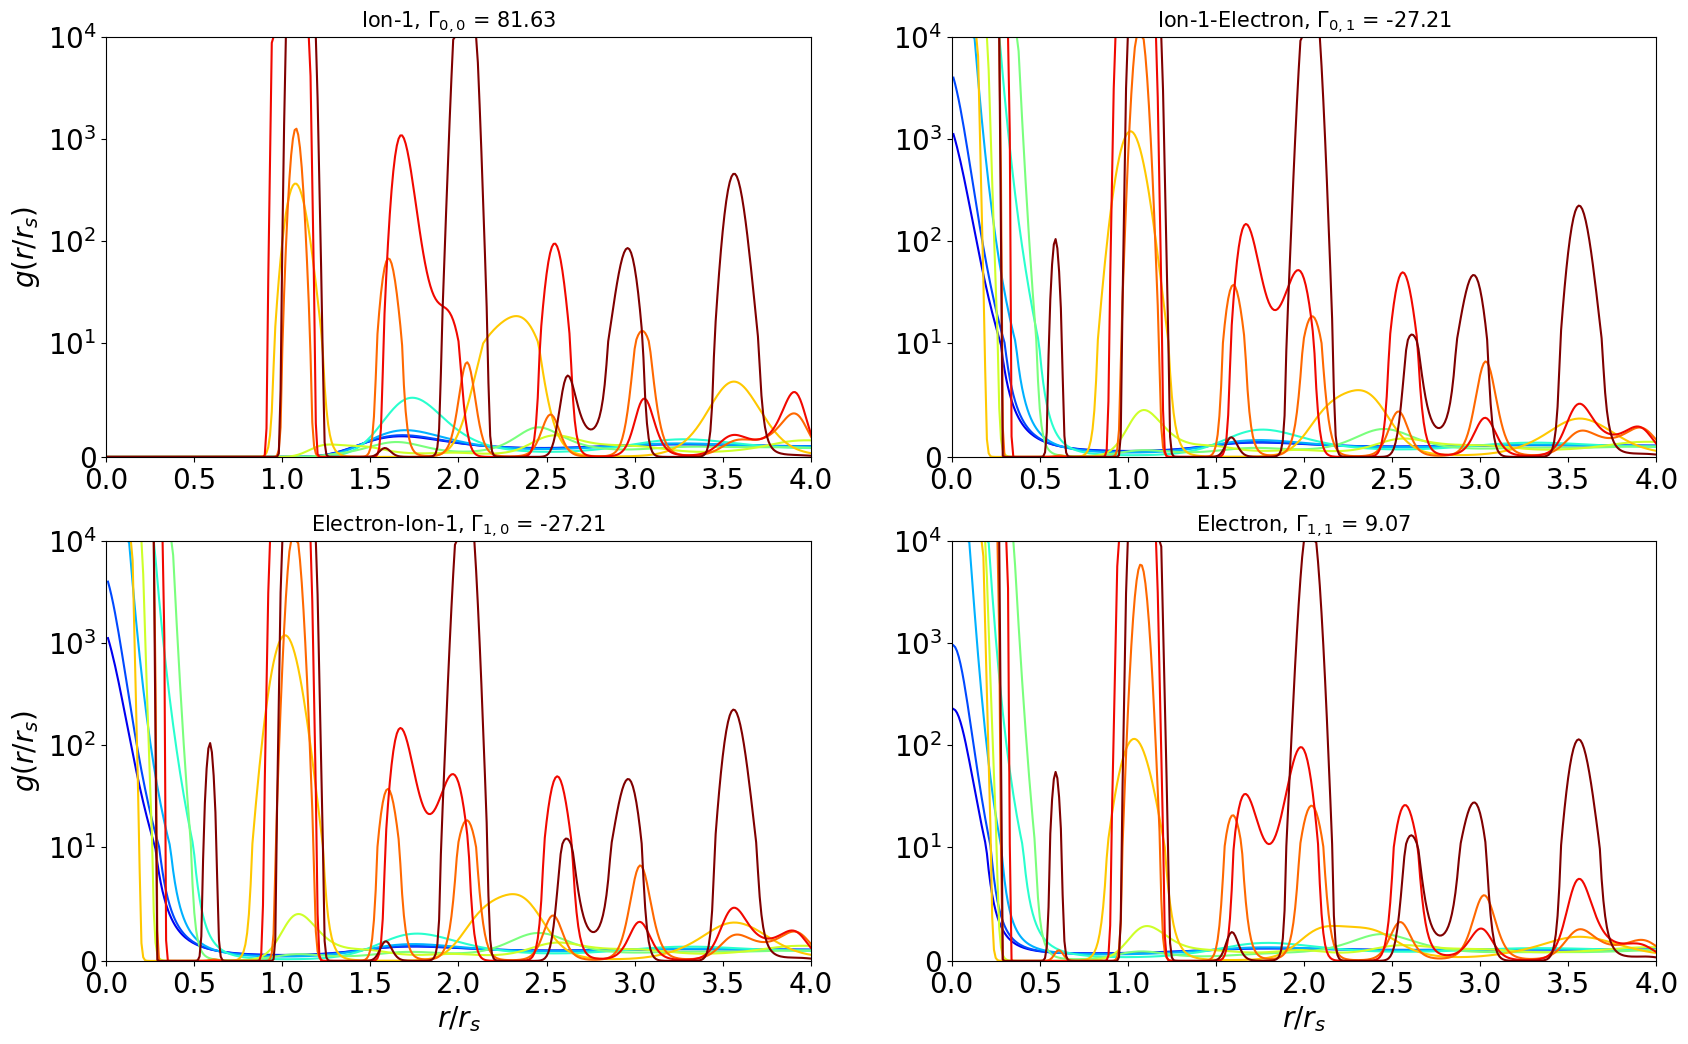

In [131]:
hnc2.plot_species_convergence(n_slices=10)

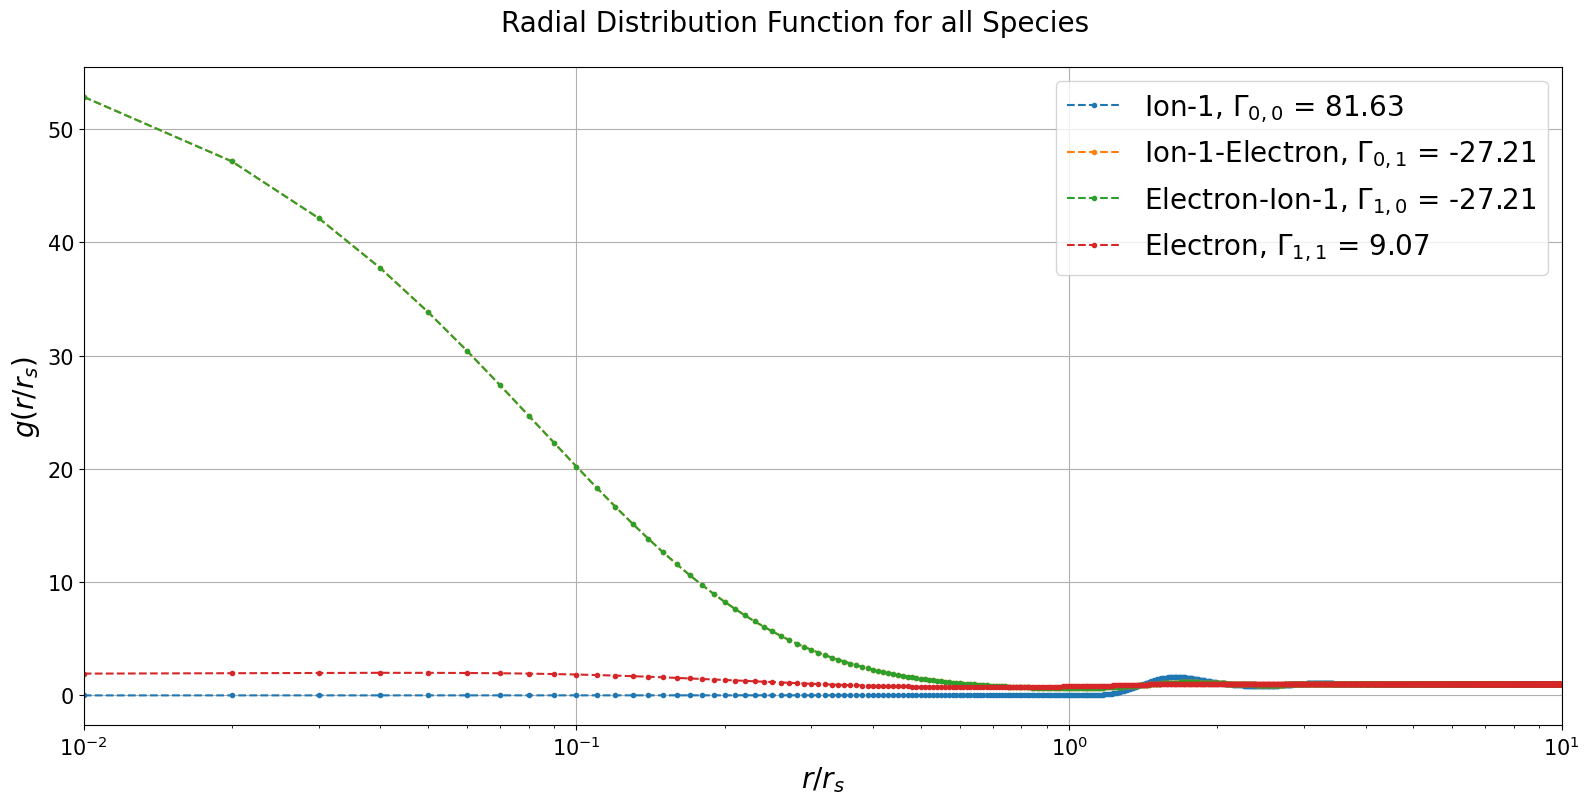

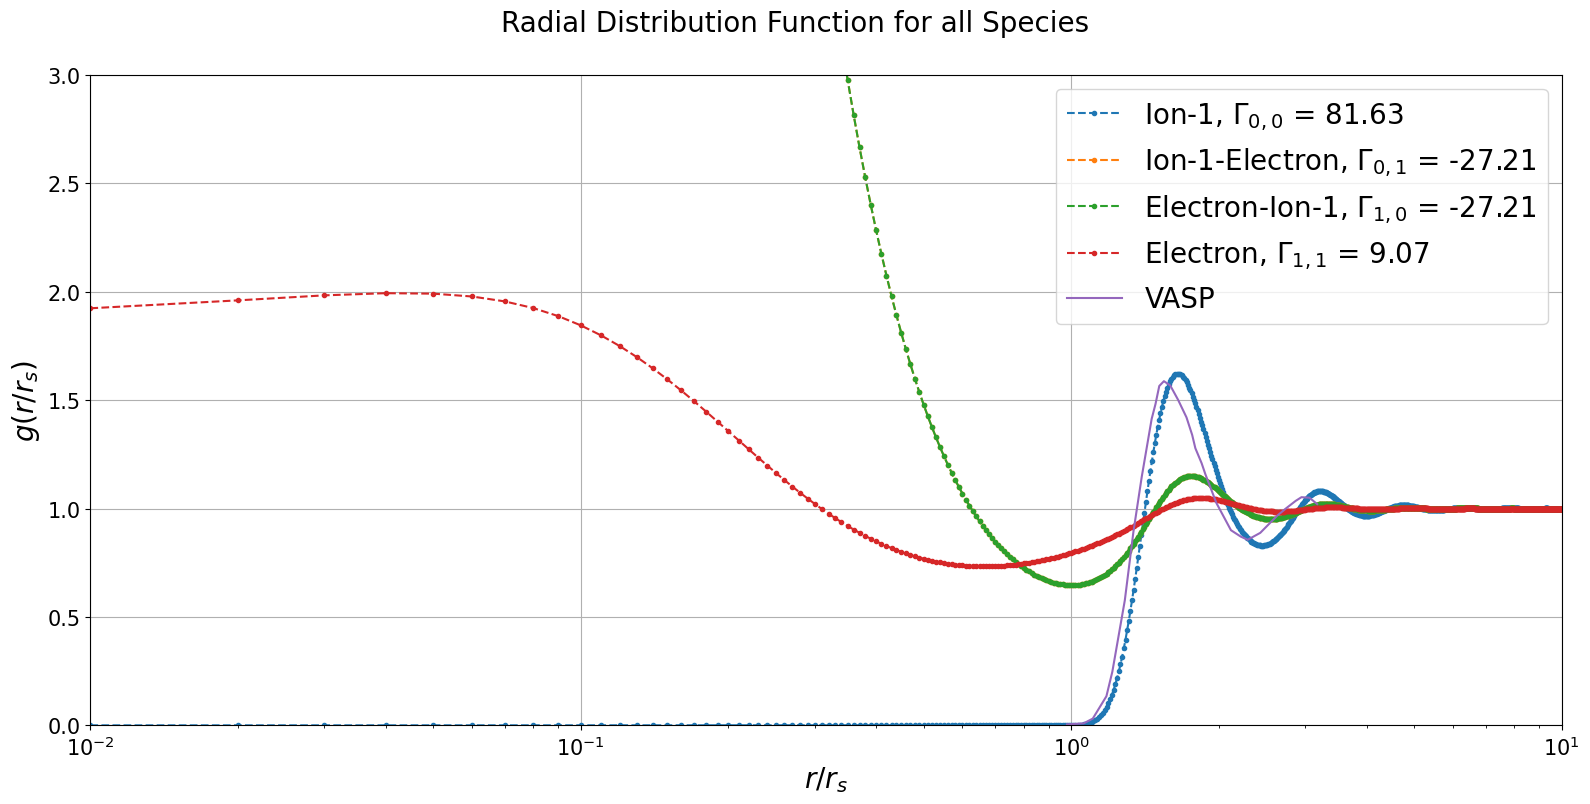

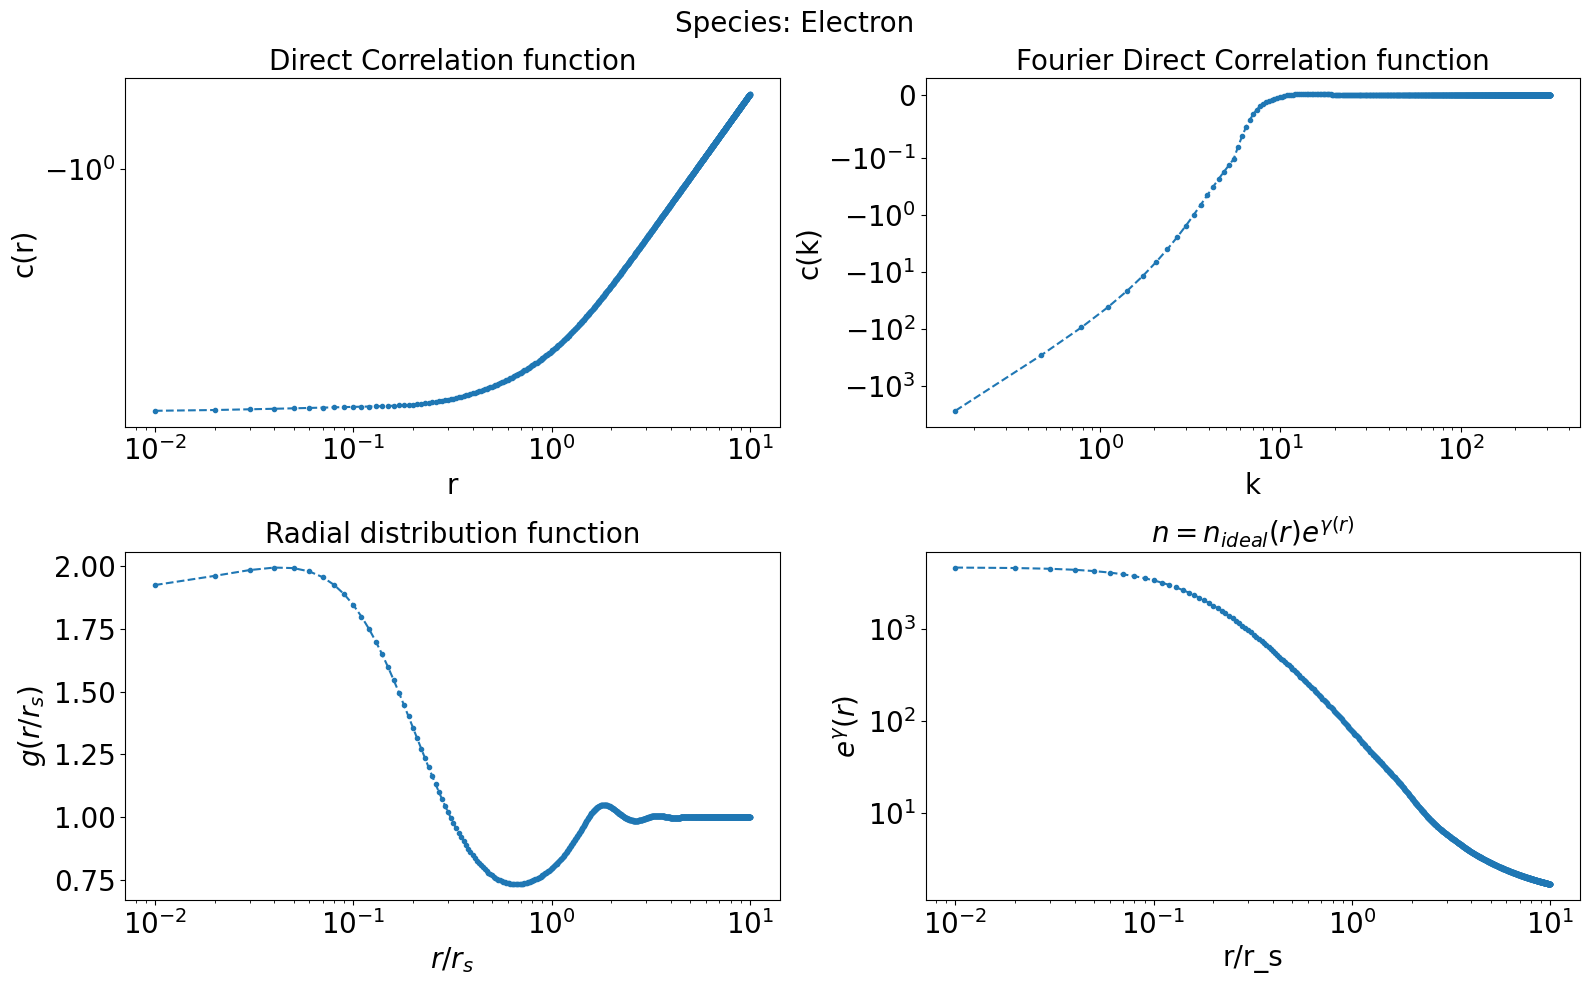

In [110]:
hnc2.plot_g_all_species()
hnc2.plot_g_all_species(gmax=3,data_to_compare=['/home/zach/plasma/datasets/RDFs/Al_1.0eV_rs3_VASP.txt'], data_names=['VASP'])
hnc2.plot_species((1,1))

In [28]:
# np.savetxt("/home/zach/Downloads/Al_1.0eV_r3_QSPHNC.txt",np.array([hnc2.r_array,hnc2.h_r_matrix[0,0]+1]).T)

# Effective Potentials

In [ ]:
hnc2.invert_HNC(1)

In [ ]:
fig, ax = plt.subplots()

ax.plot(hnc2.r_array, 1+hnc2.heff_r_matrix[0,0],label= 'h')
ax.plot(hnc2.r_array, hnc2.ceff_r_matrix[0,0],label='c')
ax.plot(hnc2.r_array,np.log(1+hnc2.heff_r_matrix)[0,0],label='log(1+h)')
ax.set_yscale('symlog',linthresh=1e-5)
ax.set_xlim(1e-1,2)
# ax.set_xscale('log')
ax.legend()

In [ ]:
hnc2.βωeff_r_matrix

In [ ]:
from pandas import read_csv
from scipy.interpolate import interp1d
luke_file = '/home/zach/plasma/atomic_forces/data/Al_T1_tab.lammps.PAIR'

luke_data = read_csv(luke_file ,delim_whitespace=True,header=3, names=['r [A]','V [eV]','F [eV/A]'])
luke_r, luke_βV = 1e-10/aB/ri*luke_data['r [A]'], 1/(Te/eV)*luke_data['V [eV]']
luke_r[165], luke_βV[165]
luke_βV_function = interp1d(luke_r, luke_βV,fill_value='extrapolate',bounds_error=False)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6),facecolor='w')
fig.suptitle(r"$T=${0:.1f} eV, $r_i$={1:.2f}".format(Te/eV,ri), fontsize=20)

ax.plot(luke_r, luke_βV,'k--', label="Luke Force Match")
ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0],'k-', label="Effective")
ax.plot(hnc2.r_array, hnc2.βu_r_matrix[0,0], label="Initial")
ax.plot(hnc2.r_array, βv_Yukawa(hnc2.r_array),label="Yukawa")
ax.set_ylabel(r'$\beta u(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
ax.set_ylim(-1,1e4)
ax.set_yscale('symlog',linthresh=1)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

# Check!

In [ ]:
# N_species = 1
# Gamma = np.array(  [[1]])
# names = ["Ion Effective"] 
# kappa = 1
# rho = np.array([3/(4*np.pi)])
# hnc_check = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-3, kappa_multiscale=10,
#                        rho = rho, num_iterations=int(1e3), R_max=10, N_bins=1000, names=names)

# hnc_luke = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-3, kappa_multiscale=10,
#                        rho = rho, num_iterations=int(1e4), R_max=10, N_bins=1000, names=names)

# # check
# βu_r_matrix = np.nan_to_num( hnc2.βueff_r_matrix,nan = -np.log(1.e-16), posinf=-np.log(1e-16) ).copy()
# hnc_check.set_βu_matrix(βu_r_matrix)
# hnc_check.HNC_solve(alpha=1)

# # luke
# # βu_r_matrix[0,0]=luke_βV_function(hnc2.r_array)
# # hnc_luke.set_βu_matrix(βu_r_matrix)
# # hnc_luke.HNC_solve(alpha=1)


In [ ]:
# np.savetxt("example_veff_1eV_rs_3aBohr.txt", np.array([hnc_check.r_array, hnc_check.βu_r_matrix[0,0]]).T,header="r/r_s,   beta v_ii^eff   (both unitless)",delimiter=', ' )

In [ ]:
# hnc_check.plot_g_all_species()

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.plot(hnc2.r_array, hnc2.h_r_matrix[0,0]+1,'.', label="Two Actual Species")
# ax.plot(hnc_check.r_array, hnc_check.h_r_matrix[0,0]+1,'-', label="One Effective Species")
# ax.plot(hnc_luke.r_array, hnc_luke.h_r_matrix[0,0]+1,'-', label="Luke HNC with Force Matched V")
# ax.set_ylabel(r'$g(r/r_s)$',fontsize=20)
# ax.set_xlabel(r'$r/r_s$',fontsize=20)
# ax.set_ylim(-0.1,3)
# ax.set_xlim(0,5)
# ax.tick_params(labelsize=15)
# ax.legend(fontsize=15)

# Curve Fitting

In [ ]:
from scipy.optimize import curve_fit

def yukawa_fit(r, Γ, κ,p):
    return  Γ/r*np.exp(-κ*r)

def yukawa_remaining_fit(r,a,b,c,d):
    return 1/(a+b*np.exp(c*(hnc2.r_array-d)))

def LJ_fit(r, a,b,m,n):
    return  1/(a*r**m + b/r**n) #+ v0

def yukawa_friedel_fit(r, Γ, κ1, a,κ2, k,  δ, v0):
    return  Γ/r*np.exp(-κ1*r) + a/r**3*np.exp(-κ2*r)*np.cos(k*r+δ) + v0

def yukawa_plus_fit(r, Γ, κ1, a,b,c):
    return  Γ/r*np.exp(-κ1*r)/(1+np.exp(b*(hnc2.r_array-c)))
# last_inf_index = int(np.argwhere(np.isinf(hnc2.βueff_r_matrix[0,0]))[-1] )

y_vals = curve_fit(yukawa_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0])
y_fit_data  = yukawa_fit(hnc2.r_array, y_vals[0][0],y_vals[0][1],y_vals[0][2])

y_remaining_vals = curve_fit(yukawa_remaining_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0]/y_fit_data)
y_remaining_fit_data  = yukawa_remaining_fit(hnc2.r_array, y_remaining_vals[0][0],y_remaining_vals[0][1],y_remaining_vals[0][2],y_remaining_vals[0][3])


# LJ_vals = curve_fit(LJ_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0],maxfev=int(1e5))
# yf_vals= curve_fit(yukawa_friedel_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0],maxfev=int(1e5))
# yp_vals= curve_fit(yukawa_plus_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0],maxfev=int(1e3))

In [ ]:
y_vals[0], y_remaining_vals[0]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

g_data = hnc2.h_r_matrix[0,0] + 1

# LJ_fit_data  = LJ_fit(hnc2.r_array, LJ_vals[0][0],LJ_vals[0][1],LJ_vals[0][2],LJ_vals[0][3])
# yf_fit_data = yukawa_friedel_fit(hnc2.r_array, yf_vals[0][0],yf_vals[0][1],yf_vals[0][2],yf_vals[0][3],yf_vals[0][4],yf_vals[0][5],yf_vals[0][6])
# yp_fit_data = yukawa_plus_fit(hnc2.r_array, yp_vals[0][0],yp_vals[0][1],yp_vals[0][2],yp_vals[0][3],yp_vals[0][4])


ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0],'k-', label="Effective")
# ax.plot(hnc2.r_array, y_fit_data*y_remaining_fit_data,'--', label="Yukawa Fit")
ax.plot(hnc2.r_array, 81.87504124/hnc2.r_array*np.exp(-0.99115223*hnc2.r_array)/(0.92620556+0.7351028*np.exp(1.72217623*(hnc2.r_array-1.75197859))),'--', label="Fit")
# ax.plot(hnc2.r_array[1:], hnc2.βueff_r_matrix[0,0][1:]-hnc2.βueff_r_matrix[0,0][:-1],'k-', label="Effective")
# ax.plot(hnc2.r_array[1:], (y_fit_data*y_remaining_fit_data)[1:]-(y_fit_data*y_remaining_fit_data)[:-1],'--', label="Yukawa Fit")

# ax.plot(hnc2.r_array, LJ_fit_data,'--', label="Yukawa Fit")
# ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0]-y_fit_data*y_remaining_fit_data,'.', label="Yukawa Fit Ratio")
 
# ax.plot(hnc2.r_array,y_remaining_fit_data,'.', label="Yukawa Remaining Fit")

# ax.plot(hnc2.r_array, yf_fit_data,'.', label="Yukawa-Friedel Fit")
# ax.plot(hnc2.r_array, yp_fit_data,'.', label="Yukawa-Plus Fit")
# ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0]/yp_fit_data,'.', label="Yukawa-Plus Fit Ratio")
# ax.plot(hnc2.r_array, 1/(1+np.exp(3*(hnc2.r_array-2.5))),'.', label="Yukawa-Friedel Fit")

ax.set_ylabel(r'$\beta u(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
# ax.set_ylim(-2,2)
ax.set_yscale('symlog',linthresh=1e-1)
ax.set_xlim(0,10)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

In [ ]:
from scipy.interpolate import RBFInterpolator



RBFInterpolator(hnc2.r_array, hnc2.βueff_r_matrix[0,0]/y_fit_data)